<h1>Image Segmentation Using K-means Clustering with Different K Values</h1>
<h4>1. Import Libraries and Set Up Display:</h4> Import necessary libraries (NumPy, OpenCV, Matplotlib) and set figure size for plots.
<h4>2. Load and Prepare Image:</h4> Load the image, convert it for RGB display in Matplotlib, and apply bilateral filtering to denoise.
<h4>3. Reshape Image for Clustering:</h4> Reshape the denoised image into a 2D array for clustering.
<h4>4. Define K-means Criteria and Cluster with Different K Values:</h4> Set the termination criteria and use a loop to apply K-means clustering for a range of K values (e.g., 2, 4, 6, 8).
<h4>5. Display Original, Denoised, and Clustered Images:</h4> Show the original, denoised, and segmented images for each K value side by side to observe clustering effects.

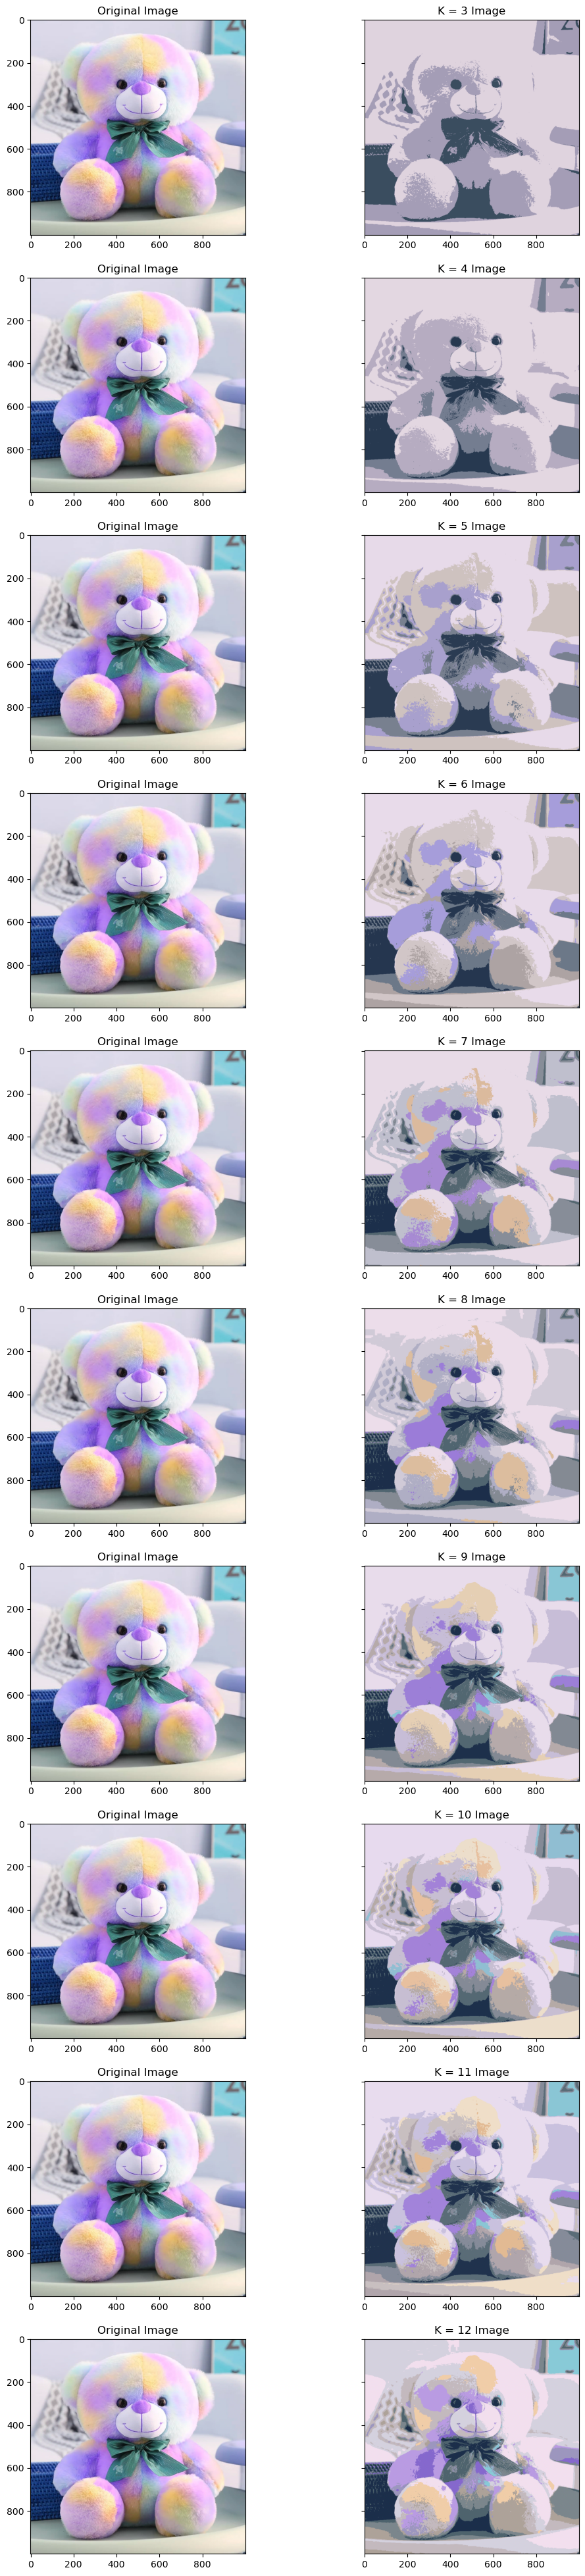

In [1]:
# imports 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
  
plt.rcParams["figure.figsize"] = (12,50) 
  
# load image 
img = cv.imread('road.jpg') 
Z = img.reshape((-1,3)) 
# convert to np.float32 
Z = np.float32(Z) 
  
# define stopping criteria, number of clusters(K) and apply kmeans() 
# TERM_CRITERIA_EPS : stop when the epsilon value is reached 
# TERM_CRITERIA_MAX_ITER:  stop when Max iteration is reached 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
  
fig, ax = plt.subplots(10,2, sharey=True) 
for i in range(10): 
  K = i+3
  # apply K-means algorithm 
  ret, label, center = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)  
  # Now convert back into uint8, and make original image 
  center = np.uint8(center) 
  res = center[label.flatten()] 
  res2 = res.reshape((img.shape)) 
  # plot the original image and K-means image 
  ax[i, 1].imshow(res2) 
  ax[i,1].set_title('K = %s Image'%K) 
  ax[i, 0].imshow(img) 
  ax[i,0].set_title('Original Image') 

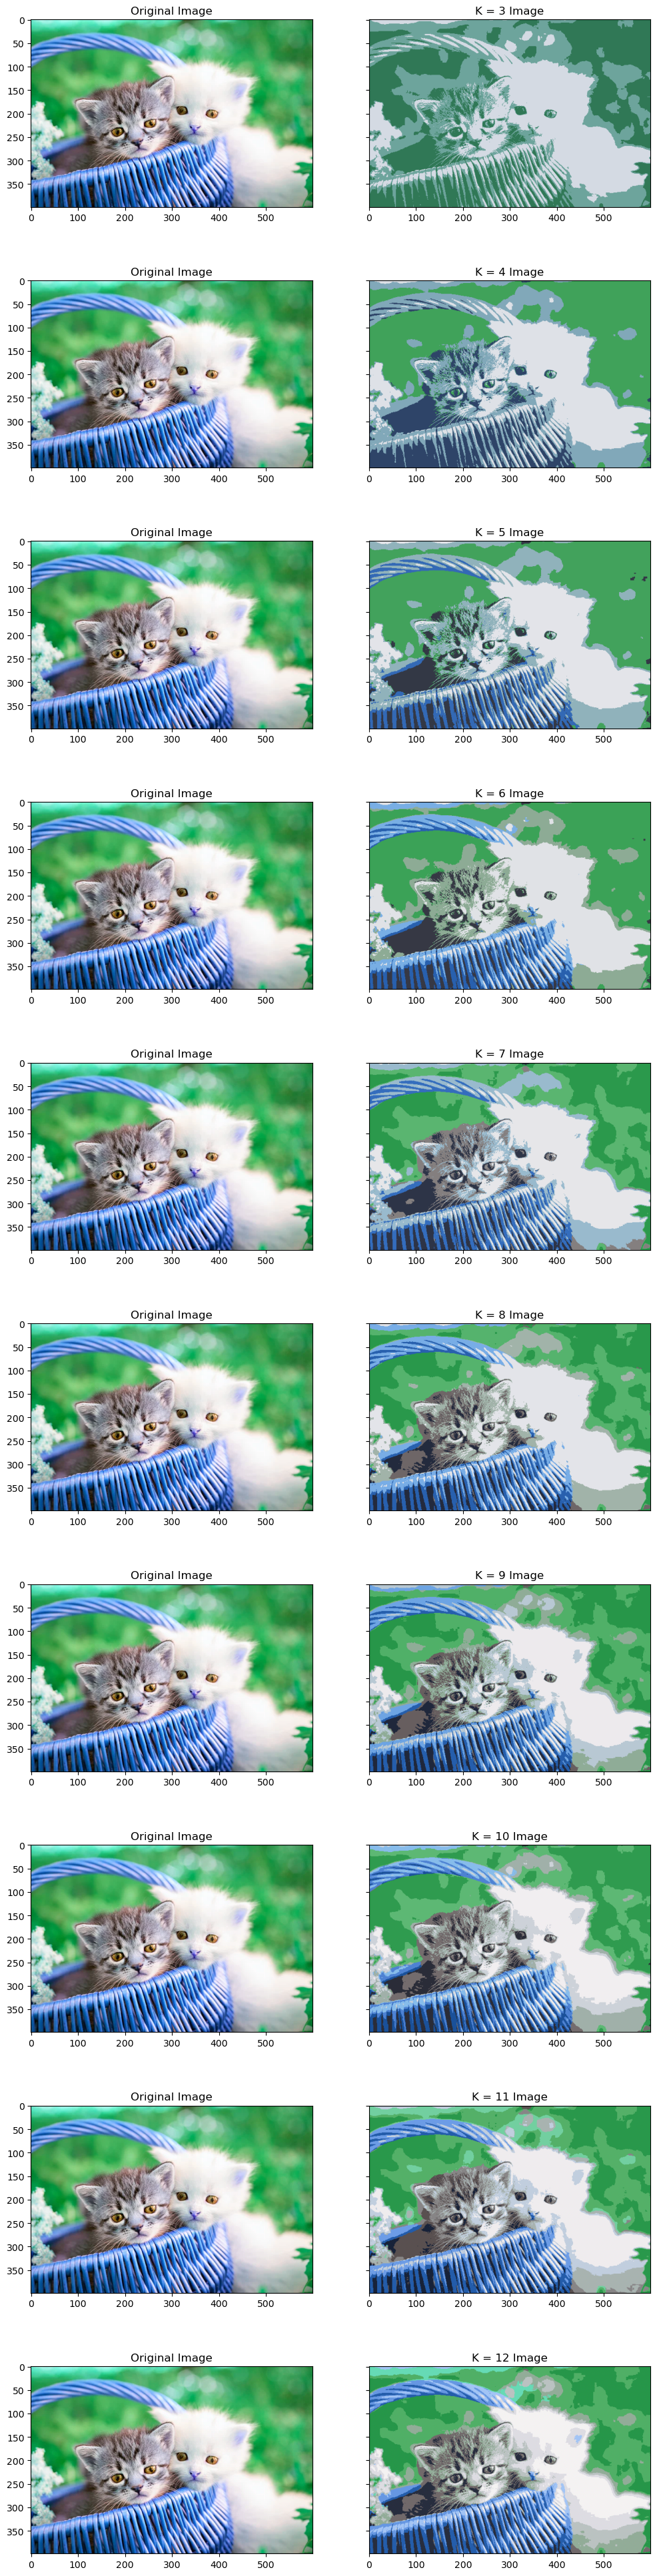

In [2]:
# imports 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
  
plt.rcParams["figure.figsize"] = (12,50) 
  
# load image 
img = cv.imread('cat.jpg') 
Z = img.reshape((-1,3)) 
# convert to np.float32 
Z = np.float32(Z) 
  
# define stopping criteria, number of clusters(K) and apply kmeans() 
# TERM_CRITERIA_EPS : stop when the epsilon value is reached 
# TERM_CRITERIA_MAX_ITER:  stop when Max iteration is reached 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
  
fig, ax = plt.subplots(10,2, sharey=True) 
for i in range(10): 
  K = i+3
  # apply K-means algorithm 
  ret, label, center = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)  
  # Now convert back into uint8, and make original image 
  center = np.uint8(center) 
  res = center[label.flatten()] 
  res2 = res.reshape((img.shape)) 
  # plot the original image and K-means image 
  ax[i, 1].imshow(res2) 
  ax[i,1].set_title('K = %s Image'%K) 
  ax[i, 0].imshow(img) 
  ax[i,0].set_title('Original Image') 

<h1>Determining Optimal K Using the Elbow Method</h1>
<h4>1. Import Libraries and Load Image:</h4> Import libraries (including scikit-learn's KMeans for clustering) and load the image.
<h4>2. Denoise and Reshape Image:</h4> Apply bilateral filtering for noise reduction and reshape the image for clustering.
<h4>3. Apply the Elbow Method to Find Optimal K:</h4> 
        -Define a range of K values to test.<br>
        -Fit K-means clustering for each K value and calculate the Within-Cluster Sum of Squares (WCSS).
<h4>4. Plot the Elbow Curve:</h4> Plot WCSS versus the number of clusters to find the "elbow," suggesting the optimal K.
<h4>5. Cluster Image with Optimal K:</h4> Choose the optimal K based on the elbow curve, and use cv.kmeans() with this K to segment the image.
<h4>6. Display Original, Denoised, and Final Clustered Image:</h4> Show the original, denoised, and final segmented images with the optimal K.

In [3]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


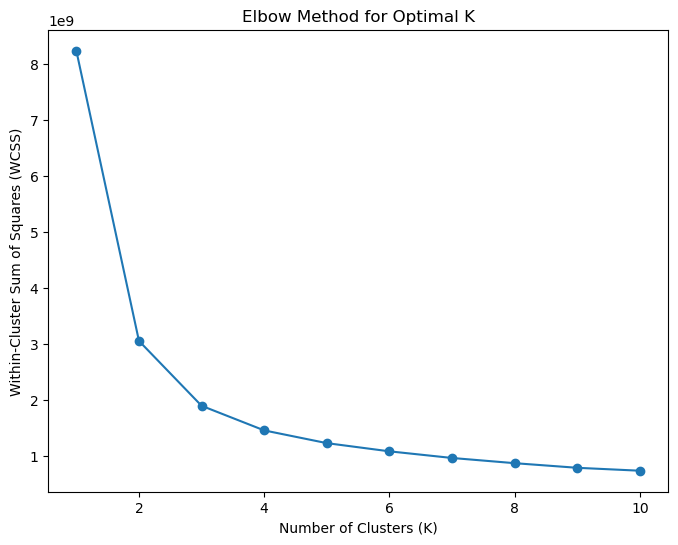

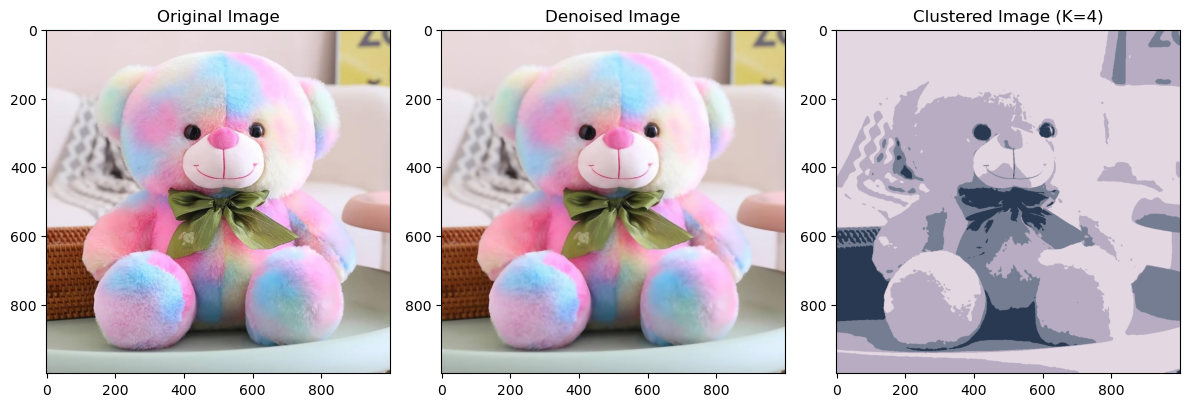

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
img = cv.imread('road.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Step 1: Denoise the image using Bilateral Filtering
denoised_img = cv.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Step 2: Prepare the image for clustering
# Reshape the denoised image to a 2D array of pixels and 3 color values (RGB)
Z = denoised_img.reshape((-1, 3))
Z = np.float32(Z)  # Ensure the data type is float32 for kmeans

# Elbow Method to determine the optimal K
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Testing K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Z)  # Using Z as the data to fit
    wcss.append(kmeans.inertia_)  # Append the WCSS (inertia) value for each K

# Plotting WCSS values for each K to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Step 3: Apply K-means clustering with an optimal value of K (determined from elbow method)
optimal_k = 4  # Replace this with the chosen K based on the elbow method
ret, label, center = cv.kmeans(Z, optimal_k, None, (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0), 10, cv.KMEANS_RANDOM_CENTERS)

# Convert cluster centers back to uint8 and map each pixel to its nearest center
center = np.uint8(center)
clustered_img = center[label.flatten()].reshape(denoised_img.shape)

# Display the original, denoised, and clustered images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Denoised Image')

plt.subplot(1, 3, 3)
plt.imshow(clustered_img)
plt.title(f'Clustered Image (K={optimal_k})')

plt.tight_layout()
plt.show()


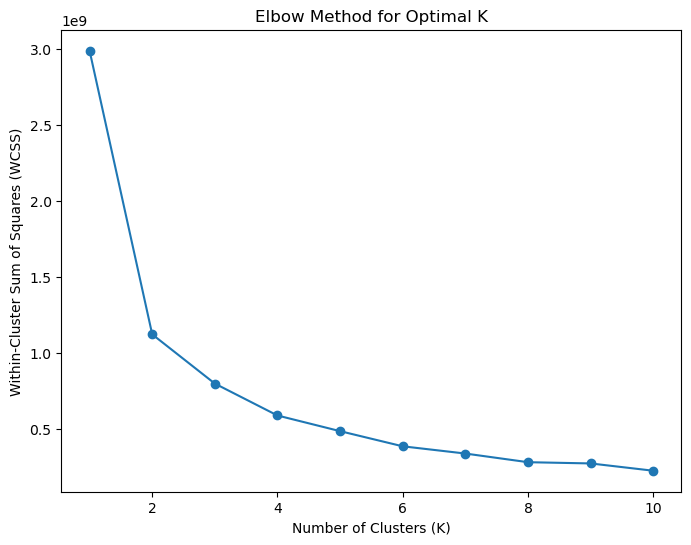

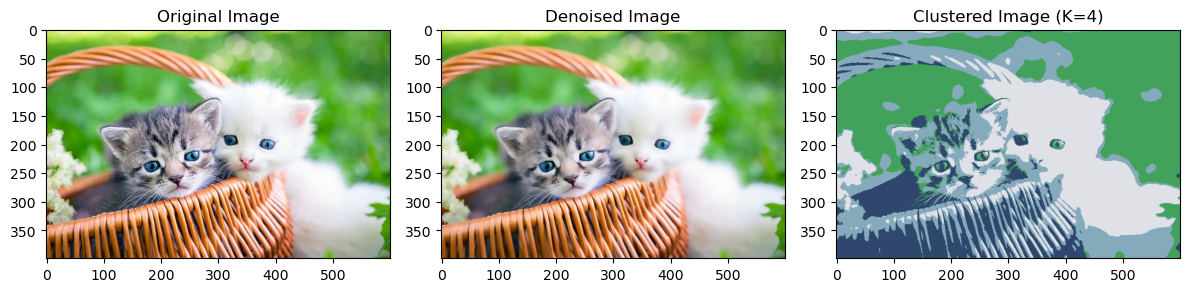

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
img = cv.imread('cat.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Step 1: Denoise the image using Bilateral Filtering
denoised_img = cv.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Step 2: Prepare the image for clustering
# Reshape the denoised image to a 2D array of pixels and 3 color values (RGB)
Z = denoised_img.reshape((-1, 3))
Z = np.float32(Z)  # Ensure the data type is float32 for kmeans

# Elbow Method to determine the optimal K
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Testing K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Z)  # Using Z as the data to fit
    wcss.append(kmeans.inertia_)  # Append the WCSS (inertia) value for each K

# Plotting WCSS values for each K to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Step 3: Apply K-means clustering with an optimal value of K (determined from elbow method)
optimal_k = 4  # Replace this with the chosen K based on the elbow method
ret, label, center = cv.kmeans(Z, optimal_k, None, (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0), 10, cv.KMEANS_RANDOM_CENTERS)

# Convert cluster centers back to uint8 and map each pixel to its nearest center
center = np.uint8(center)
clustered_img = center[label.flatten()].reshape(denoised_img.shape)

# Display the original, denoised, and clustered images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Denoised Image')

plt.subplot(1, 3, 3)
plt.imshow(clustered_img)
plt.title(f'Clustered Image (K={optimal_k})')

plt.tight_layout()
plt.show()
